<img src="https://miro.medium.com/max/3840/1*e3E0OQzfYCuWk0pket5dAA.png" alt="Reddit Logo" />
<h1 style="font-size:36px;">Post Title length VS Upvotes</h1>
<h4>
Authors: Andrew Paul, Chigozie Nna</h4>
<hr>
<body>
<h1>Introduction </h1>
    
Reddit is an American social news aggregation, web content rating, and discussion website. Reddit originally created by two University of Virgina Students, Steven Huffman and Alexis Ohanian, in the year 2005. A year later Condé Nast Publications acquired the site as their own. Popularity in Reddit began to arise, as by 2007 NSFW, Programming, and Science where the the top trending subreddits of the time. By the year 2008, a launch of numerous different subreddits began to popularize the site, with Reddit being able to gain enough popularity to overtake Digg in search popularity by 2010. Reddit’s rise to fame did not stop there with, Reddit finally achieving a total of one billion page views per month in the year 2011. The goal of Reddit is for members to be able to submit content to the site in the form of links, text posts, and images, which can then be voted up or down by opposing members. The posts are categorized into items called “Subreddits” where users can share specific topics and/or interests that relate to the category at hand. Full details on it’s timeline and history can be viewed here.

In this tutorial, our goal is to tidy up the data of posts within a years total, to provide us with knowledge into which what the amount of characters in a post cause the most effect in terms of up votes, down votes, score, and in general a reaction to the post. Post may vary in topics, arguments, time posted, and many more varieties, but we feel as if the popularity really depends on the length of characters used. We will be able to determine which length is just to short, and what length is long enough to bore an audience and not give the time to react to it. We hope to give enough information and analysis to provide, clarity, understanding and hopefully a new found interest to readers that are unfamiliar with the social foreground. Hopefully those who are frequent Reddit users, will gain some insight on how long they should make their posts if they are trying to gain more popularity.
<body>
<hr>
<body>
<h1 id="getting-started-with-the-data">Getting started with the Data</h1>
<p>We decided to use Python 3 and SQL to help gain and analyze our data. Crucial libraries used to help us where: <a href="https://towardsdatascience.com/a-quick-introduction-to-the-pandas-python-library-f1b678f34673">pandas</a>, <a href="https://matplotlib.org/">matplotlib</a>, <a href="https://python-graph-gallery.com/seaborn/">seaborn</a>, and <a href="https://machinelearningmastery.com/a-gentle-introduction-to-scikit-learn-a-python-machine-learning-library/">scikit-learn</a>.</p>
</body>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn import model_selection
from sklearn import linear_model
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder

<body> We plan on using multiple panda dataframes that will be read in using SQL commands through googles BigQuery website.
    
<h2>Processing and Recieving data </h2>

We used the following SQL command through Googles BigQuery to at first take data from a third party called <a href=https://pushshift.io/>"Pushshift"</a> that is a Reddit API that tracks almost all of Reddit's for the last few years. We are taking in data from 2016 to Augst 2019 due to the immense amount of data that is tracked.
</body>

<img src= "https://i.imgur.com/xc6mlpA.png>" alt= "SQL Code" width="400"/>

<body> In this SQL Query we are getting the length of every single title, averaging the score based on the length of the title, the average number of comments based on the length of the title, and the number of posts with that amount of characters. This is done by using the 'GROUP BY' command with SQL. BigQuery convertd this data into a <a href= https://www.howtogeek.com/348960/what-is-a-csv-file-and-how-do-i-open-it/>csv file</a>, which is a table or excel seperating the data by commas (,) making it easy to parse and split the data with.

<h2> Reading the Data </h2>

We will First use Pythons Pandas to read in the csv file and convert it into a panda <a href=https://www.geeksforgeeks.org/python-pandas-dataframe/>dataframe</a>, which is a two-dimensional size-mutable, potentially heterogeneous tabular data structure with labeled axes (rows and columns)

In [13]:
data = pd.read_csv('LengthScoreComments.csv', sep=',')
data[:10]

,length_title,avg_score,avg_comments,num_posts
0,1,40.804163,1.789499,472705
1,2,65.521526,2.796440,739424
2,3,65.577614,3.039975,1361269
3,4,92.408734,3.559541,2588850
4,5,84.223042,3.203536,2210213
5,6,129.382588,3.370371,3850745
6,7,105.844544,3.985902,2858907
7,8,99.618349,4.208025,2939891
8,9,104.936504,4.531499,3818682
9,10,103.995719,4.758954,3773035


In the DataFrame above you can see: 
   * length_title: Amount of Characters in the title
   * avg_score: The average Score the post will recieve with character length
   * avg_comments: The average amount of comments a post will recieve with character length
   * num_posts: The Number of posts between 2016-Aug 2019 with character Length

<hr size="20">
<body>
<h2> Graphing</h2>

In this first graph we will graph to see the relation between Length of Title verse the Average Score to see if there is a relation between if a reddit user will reciever more votes based on the character length of their post. This can help readers get an insight to how long they should make their posts if they desire to be the most popular reddit user of their peers.
</body>

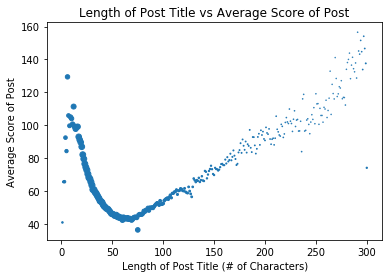

In [3]:
plt.scatter(x = data['length_title'], y = data['avg_score'], s = data['num_posts']/200000)
plt.title('Length of Post Title vs Average Score of Post')
plt.xlabel('Length of Post Title (# of Characters)')
plt.ylabel('Average Score of Post')
plt.show()

<body> We can see that there is a clear relation between the upvotes and the  number of characters in the post title. Based on the graph it seems that it is the best to have captions of Character lengths between 5-25 and 153-300+. The range most likely is based off the fact that the type of posts are farely different. There are many popular subreddits named short and quick things like "meow" to follow a trend that will be a picture of a cat that revieve many likes as long as they are following the trend. This Explains the peak and the downtrend of the number of likes as the posts begin to be normal and causal day to day type of posts. The number of UpVotes however does begin to rise again as the number of character are longer. This is because as the characters get longer, they tend to be actual issues and problems that recieve more views and reactions (ex: A president trump quote = more characters and responses).
<body>

<hr size="20">

<h2> Comments </h2>

<p> We then decided to check if there was a relation between amount of comments verse the character length of the posts. People will place upvotes to anything they think is funny, however we wanted to see which posts actually get people commenting. Comments are what we deemed as true reactions to the posts, since it requires viewers to put in more effort than just a click for an upvote.</p>

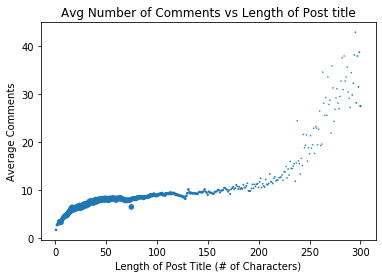

In [8]:
plot = plt.scatter(x = comments['length_title'], y = comments['avg_comments'], s = comments['num_posts']/200000)
plt.title('Avg Number of Comments vs Length of Post title')
plt.xlabel('Length of Post Title (# of Characters)')
plt.ylabel('Average Comments')
plt.show()

<body>Based on the relation we are able to see that the Number of comments are actually greater based on the character length of the posts. A reasoning for this data is that the longer the character length in posts most likely mean, it is on a controversial topic, quote, or a scientific analysis that people are more likely to comment on and put their input. This is in contrast to small memes and jokes that will mostly recieve likes and not comments.</body>

<hr size=20>

<h2> Filtered Data </h2>
    
<p> We then decided to filter our data because there was very big bias with the top subreddits with small captions. We want to see the relationship between length and upvotes for typical reddit day to day users, that are making posts that arent silly small trends like "meow"</p>

<img src="https://i.imgur.com/bALsUPt.png" width="500" />

<p> In this SQL Query we are creating an entirely new cvs file with the top 15 subreddits to see the relation between these subreddits that people typically talk about on a day to day basis. This data should give an accurate analysis of what we were looking for and give a different result in the relation shown in the graph<p>

In [16]:
Unbias = pd.read_csv('FilteredSubLengthScore.csv', sep=',')
Unbias[:10]

,length_title,avg_score,num_posts
0,1,90.522604,9401
1,2,210.944914,18934
2,3,207.167737,35812
3,4,218.983280,61842
4,5,241.415093,57298
5,6,271.754140,62556
6,7,285.368175,77455
7,8,288.794141,94686
8,9,316.807680,123414
9,10,313.843326,141357


In the DataFrame above you can see: 
   * length_title: Amount of Characters in the title
   * avg_score: The average Score the post will recieve with character length
   * num_posts: The Number of posts between 2016-Aug 2019 with character Length


<hr size="20">
<body>
<h2> Graphing Filtered Data</h2>

In this next graph we will graph to see the relation between Length of Title verse the Average Score to see if there is the same relation as the first graph, however if there is now a change in the data now that it is based off the top 15 most popular subreddits. This should give a more accurate amount of data that should actually help reddit users decide how loong their pots should be so they can be popular.
</body>

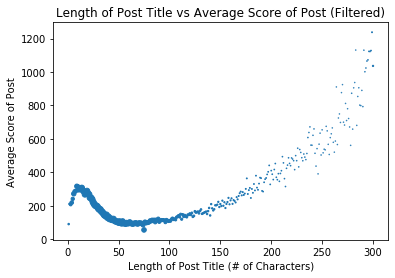

In [18]:
plt.scatter(x = Unbias['length_title'], y = Unbias['avg_score'], s = data['num_posts']/200000)
plt.title('Length of Post Title vs Average Score of Post (Filtered)')
plt.xlabel('Length of Post Title (# of Characters)')
plt.ylabel('Average Score of Post')
plt.show()